In [1]:
from tdc.multi_pred import DTI

data = DTI("BindingDB_Kd", print_stats=True)

#help(data)

Downloading...
100%|██████████| 54.4M/54.4M [00:08<00:00, 6.70MiB/s]
Loading...
--- Dataset Statistics ---
10661 unique drugs.
1413 unique targets.
52274 drug-target pairs.
--------------------------
Done!


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = data.get_data()

df

,Drug_ID,Drug,Target_ID,Target,Y
0,444607.0,Cc1ccc(CNS(=O)(=O)c2ccc(S(N)(=O)=O)s2)cc1,P00918,MSHHWGYGKHNGPEHWHKDFPIAKGERQSPVDIDTHTAKYDPSLKP...,0.460
1,4316.0,COc1ccc(CNS(=O)(=O)c2ccc(S(N)(=O)=O)s2)cc1,P00918,MSHHWGYGKHNGPEHWHKDFPIAKGERQSPVDIDTHTAKYDPSLKP...,0.490
2,4293.0,NS(=O)(=O)c1ccc(S(=O)(=O)NCc2cccs2)s1,P00918,MSHHWGYGKHNGPEHWHKDFPIAKGERQSPVDIDTHTAKYDPSLKP...,0.830
3,1611.0,NS(=O)(=O)c1cc2c(s1)S(=O)(=O)N(Cc1cccs1)CC2O,P00918,MSHHWGYGKHNGPEHWHKDFPIAKGERQSPVDIDTHTAKYDPSLKP...,0.200
4,1612.0,COc1ccc(N2CC(O)c3cc(S(N)(=O)=O)sc3S2(=O)=O)cc1,P00918,MSHHWGYGKHNGPEHWHKDFPIAKGERQSPVDIDTHTAKYDPSLKP...,0.160
...,...,...,...,...,...
52269,53358942.0,COc1cc(C(=O)O)ccc1NC(=O)[C@@H]1N[C@@H](CC(C)(C...,NaN,MCNTNMSVPTDGAVTTSQIPASEQETLVRPKPLLLKLLKSVGAQKD...,0.150
52270,53476877.0,CC(C)(C)C[C@@H]1N[C@@H](C(=O)N[C@H]2CC[C@H](O)...,NaN,MCNTNMSVPTDGAVTTSQIPASEQETLVRPKPLLLKLLKSVGAQKD...,2.700
52271,58573469.0,CC(C)[C@@H](CS(=O)(=O)C(C)C)N1C(=O)[C@@](C)(CC...,NaN,MCNTNMSVPTDGAVTTSQIPASEQETLVRPKPLLLKLLKSVGAQKD...,0.045
52272,113557.0,CCCCCCCOC1OC(CO)C(O)C(O)C1O,P08191,MKRVITLFAVLLMGWSVNAWSFACKTANGTAIPIGGGSANVYVNLA...,17.000


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52274 entries, 0 to 52273
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Drug_ID    52274 non-null  float64
 1   Drug       52274 non-null  object 
 2   Target_ID  47941 non-null  object 
 3   Target     52274 non-null  object 
 4   Y          52274 non-null  float64
dtypes: float64(2), object(3)
memory usage: 2.0+ MB


In [4]:
df.describe()

,Drug_ID,Y
count,5.227400e+04,5.227400e+04
mean,2.587647e+07,4.353189e+04
std,3.469676e+07,4.102312e+05
min,5.100000e+01,0.000000e+00
25%,5.328940e+06,2.200000e+02
50%,1.107117e+07,9.800000e+03
75%,2.518873e+07,1.000000e+04
max,1.388059e+08,1.000000e+07


1. Distribution of Affinity Values (Y):

This plot reveals the spread of binding affinities in your dataset. You can use a histogram or a KDE plot:

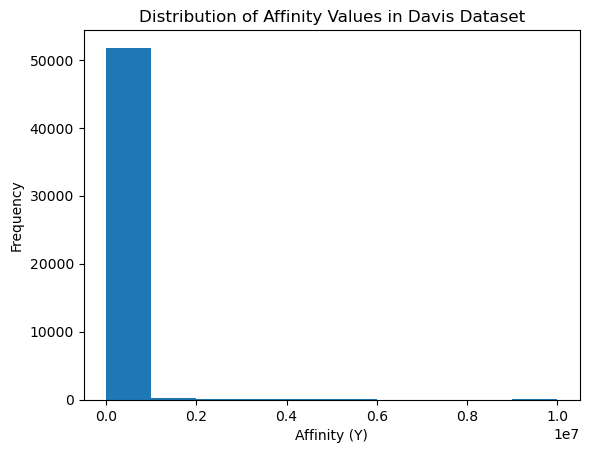

In [5]:
# Assuming 'Y' represents affinity values
plt.hist(df['Y'])
plt.xlabel('Affinity (Y)')
plt.ylabel('Frequency')
plt.title('Distribution of Affinity Values in Davis Dataset')
plt.show()

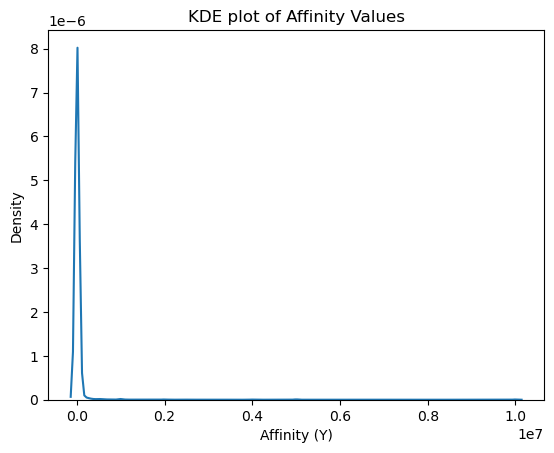

In [6]:
# For Kernel Density Estimation (KDE) plot
sns.kdeplot(df['Y'])  # Using seaborn for KDE plot
plt.xlabel('Affinity (Y)')
plt.ylabel('Density')
plt.title('KDE plot of Affinity Values')
plt.show()

2. Drug Counts per Target:

This plot explores the number of drugs interacting with each target protein. It can reveal potential biases or sparsity:

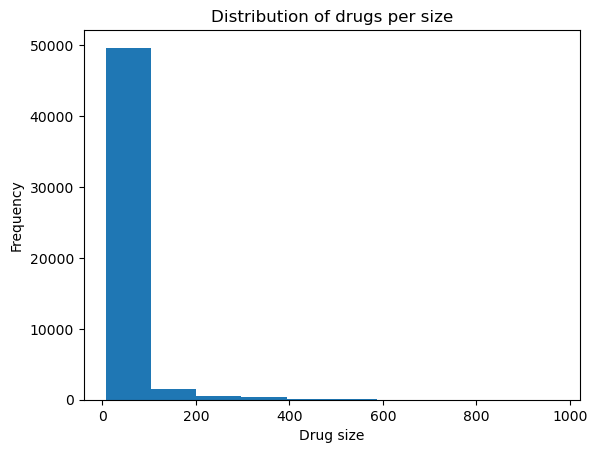

In [7]:
# Assuming 'Target_ID' is your identifier for targets
target_counts = df['Drug'].apply(len)
target_counts.plot(kind='hist', title='Distribution of drugs per size')
plt.xlabel('Drug size')
plt.ylabel('Frequency')
plt.show()

3. Scatter Plot of Affinity (Y) vs. Target Sequence Length (if available):

This plot investigates the relationship between target protein sequence length and binding affinity:

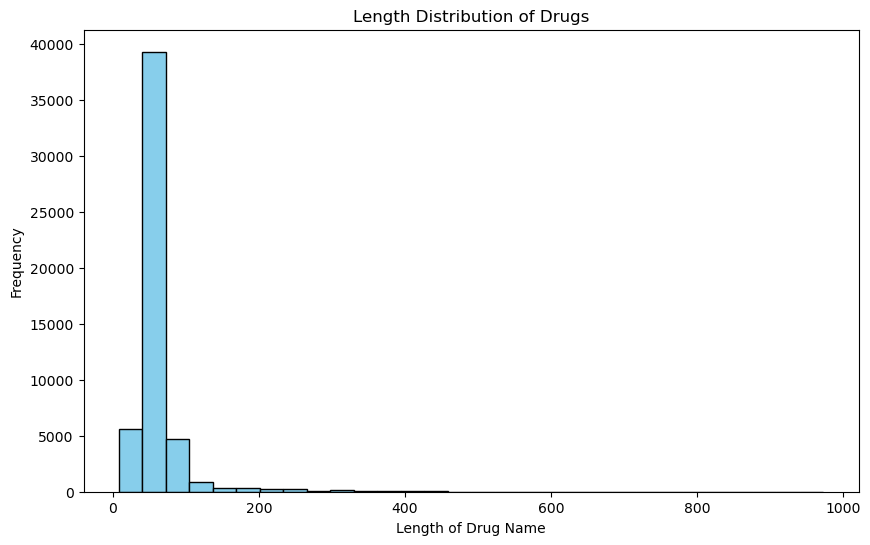

In [8]:
# Assuming 'df' is your DataFrame
df['Drug_length'] = df['Drug'].apply(len)

plt.figure(figsize=(10,6))
plt.hist(df['Drug_length'], bins=30, color='skyblue', edgecolor='black')
plt.title('Length Distribution of Drugs')
plt.xlabel('Length of Drug Name')
plt.ylabel('Frequency')
plt.show()

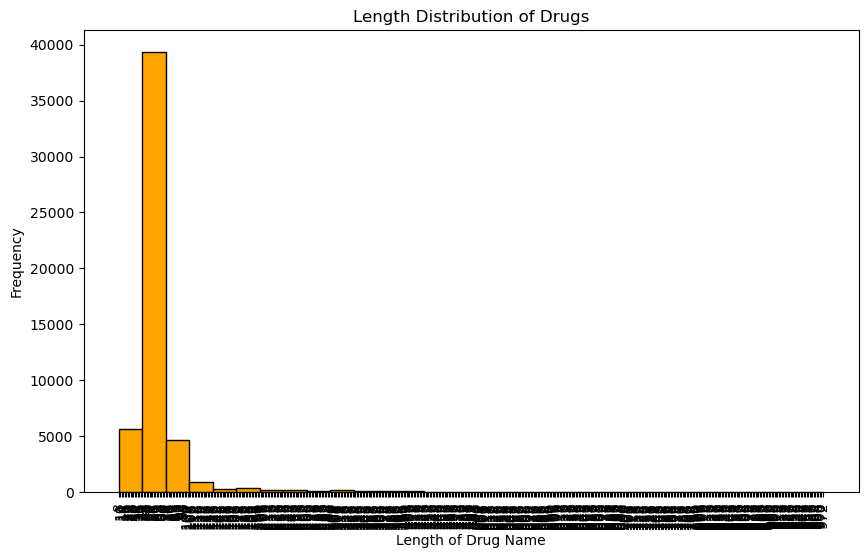

In [9]:
plt.figure(figsize=(10,6))
plt.hist(df['Drug_length'], bins=30, color='orange', edgecolor='black')  # Increase the number of bins to 100
plt.title('Length Distribution of Drugs')
plt.xlabel('Length of Drug Name')
plt.ylabel('Frequency')

# Set xticks to have more labels on x-axis
xticks = range(min(df['Drug_length']), max(df['Drug_length'])+1, 2)
plt.xticks(xticks, rotation=90)

plt.show()

In [10]:
# Assuming you have a column for 'Target_Length'
plt.scatter(df['Target_Length'], df['Y'])
plt.xlabel('Target Sequence Length')
plt.ylabel('Affinity (Y)')
plt.title('Affinity vs. Target Sequence Length')
plt.show()

KeyError: 'Target_Length'

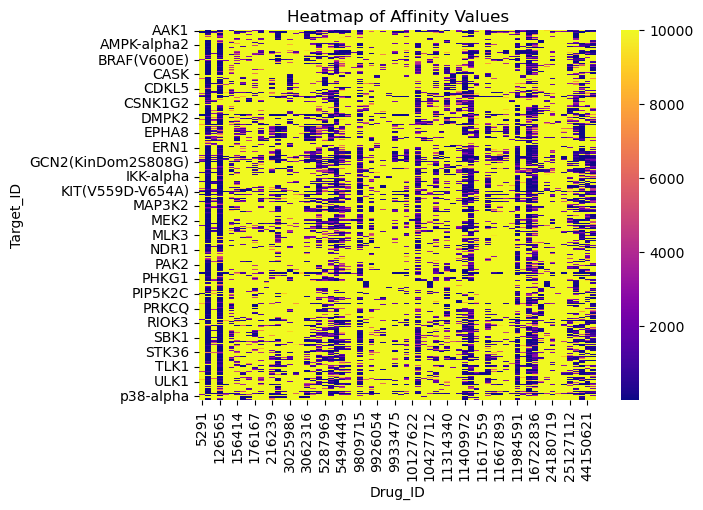

In [ ]:
# Assuming 'Drug_ID' and 'Target_ID' are for rows and columns
pivot_table = pd.pivot_table(df, values='Y', index='Target_ID', columns='Drug_ID')
sns.heatmap(pivot_table, cmap='plasma')  # Using seaborn for heatmap
plt.title('Heatmap of Affinity Values')
plt.show()